<h1><center> Suicide Rate Distribution by Regions</center></h1> 
__<div style="text-align: right"> Junyan Huang</div>__
__<div style="text-align: right"> Oct 2, 2018 WEEK 5</div>__

## Introdution
This project is to find out the suicide rate distribution among the regions. In order to do so, I will firstly merge the needed  columns from the suicide tables and create a new table for the suicide records. The same method will be used to create a new table for the overall records (the records include suicide and non suicide). Then I will calculate the suicide rate and finally plot the result.

## Merge needed columns from suicide tables

In the section, I will merge patientunitstayid and hospitalid from the sui_patient table with hospitalid and region from the sui_hospital table. I will take each patientunitstayid as one suicide record. One patient may have multiple patientunitstayid, but this issue will be not addressed in this project. The new dataframe will consist of the suicide record and its belonging region.

In [3]:
import pandas as pd

In [4]:
sui_hospital = pd.read_csv("sui_hospital.csv", header=0)
print(sui_hospital.head())

   Unnamed: 0  hospitalid numbedscategory teachingstatus   region
0           0          56            <100              f  Midwest
1           1          58       100 - 249              f  Midwest
2           3          60            <100              f  Midwest
3           4          61            <100              f  Midwest
4           5          63       100 - 249              f  Midwest


In [5]:
sui_patient = pd.read_csv("sui_patient.csv", header=0)
print(sui_patient.shape)

(1470, 30)


In [194]:
sui_records = sui_patient[["patientunitstayid", "hospitalid"]].copy()

In [195]:
sui_records = sui_records.sort_values(by=['hospitalid'])

In [196]:
sui_records =sui_records.reset_index(drop=True)

In [197]:
print(sui_records.head(20))

    patientunitstayid  hospitalid
0              226807          56
1              225353          56
2              208143          56
3              183218          58
4              237979          58
5              233012          58
6              177604          58
7              174608          58
8              230259          58
9              227942          58
10             220970          58
11             216152          58
12             206297          58
13             206849          58
14             197254          60
15             204099          60
16             211262          60
17             185920          60
18             160313          60
19             163527          60


In [198]:
print(type(sui_records))

<class 'pandas.core.frame.DataFrame'>


In [199]:
print(sui_records.shape)

(1470, 2)


In [200]:
hospital_region = sui_hospital[["hospitalid", "region"]].copy()

In [201]:
print(hospital_region.head(20))

    hospitalid   region
0           56  Midwest
1           58  Midwest
2           60  Midwest
3           61  Midwest
4           63  Midwest
5           66  Midwest
6           67  Midwest
7           68  Midwest
8           69  Midwest
9           71  Midwest
10          73  Midwest
11          79  Midwest
12          90  Midwest
13          92  Midwest
14          95  Midwest
15          96      NaN
16         102      NaN
17         108  Midwest
18         110    South
19         112    South


In [202]:
print(type(hospital_region))

<class 'pandas.core.frame.DataFrame'>


In [203]:
sui_region = sui_records.merge(hospital_region, how='outer')

In [204]:
print(sui_region.head(20))

    patientunitstayid  hospitalid   region
0              226807          56  Midwest
1              225353          56  Midwest
2              208143          56  Midwest
3              183218          58  Midwest
4              237979          58  Midwest
5              233012          58  Midwest
6              177604          58  Midwest
7              174608          58  Midwest
8              230259          58  Midwest
9              227942          58  Midwest
10             220970          58  Midwest
11             216152          58  Midwest
12             206297          58  Midwest
13             206849          58  Midwest
14             197254          60  Midwest
15             204099          60  Midwest
16             211262          60  Midwest
17             185920          60  Midwest
18             160313          60  Midwest
19             163527          60  Midwest


In [205]:
print(sui_region.shape)

(1470, 3)


The new table called sui_region has been successful merged. Each observation is a suicide record and has the region indicating where this suicide record belongs to. 

## Merge the needed columns from the overall tables

This section is to create a new table for the overall records (include suicide and non suicide). The same method as in the previous section will be used.

In [206]:
patient = pd.read_csv("/home/cs52205/patient.csv.gz", compression="gzip", header=0, sep=",")

In [207]:
print(patient.shape)

(200859, 29)


In [208]:
hospital = pd.read_csv("/home/cs52205/hospital.csv.gz", compression="gzip", header=0, sep=",")

In [209]:
print(hospital.head())

   hospitalid numbedscategory teachingstatus   region
0          56            <100              f  Midwest
1          58       100 - 249              f  Midwest
2          59            <100              f  Midwest
3          60            <100              f  Midwest
4          61            <100              f  Midwest


In [210]:
hospital_region_overal = hospital[["hospitalid", "region"]].copy()

In [211]:
print(hospital_region_overal.head())

   hospitalid   region
0          56  Midwest
1          58  Midwest
2          59  Midwest
3          60  Midwest
4          61  Midwest


In [212]:
records_overal = patient[["patientunitstayid", "hospitalid"]].copy()

In [213]:
print(records_overal.head())
print(records_overal.shape)

   patientunitstayid  hospitalid
0             141168          59
1             141178          60
2             141179          60
3             141194          73
4             141196          67
(200859, 2)


In [214]:
region_overal = records_overal.merge(hospital_region_overal, how='outer') 

In [215]:
print(region_overal.head())
print(region_overal.shape)

   patientunitstayid  hospitalid   region
0             141168          59  Midwest
1             141263          59  Midwest
2             141264          59  Midwest
3             141304          59  Midwest
4             141432          59  Midwest
(200859, 3)


Another new table called region_overal has been created. In the region_overal table, each row is an ICU visit record with its belonging region.

## Calculate the suicide rate by regions and plot the result

In this section, I aim to get three results. The first one is the number of suicide records in each region. The secord one is the number of overall ICU visit records in each region. The third one is the suicide rate in each region.

In [216]:
import matplotlib.pyplot as plt

Check if the sui_region and region_overal have any missing values. If there is, delete them.

In [217]:
sui_region.isnull().sum()

patientunitstayid     0
hospitalid            0
region               83
dtype: int64

In [218]:
sui_region_clean = sui_region.dropna(how = "any")

In [219]:
sui_region_clean.isnull().sum()

patientunitstayid    0
hospitalid           0
region               0
dtype: int64

In [220]:
region_overal.isnull().sum()

patientunitstayid        0
hospitalid               0
region               13838
dtype: int64

In [221]:
region_overal_clean = region_overal.dropna(how="any")

In [222]:
region_overal_clean.isnull().sum()

patientunitstayid    0
hospitalid           0
region               0
dtype: int64

Create a function to count the number of hospitals and the number of regions

In [223]:
def counter(my_list):
    my_counter = {}
    for item in my_list:
        if item in my_counter.keys():
            my_counter[item]+=1
        else:
            my_counter[item]=1
    return my_counter
            

In [224]:
sui_region_list = list(sui_region_clean["region"])
print(type(sui_region_list))

<type 'list'>


In [225]:
count_sui_region = counter(sui_region_list)
print(count_sui_region)

{'West': 231, 'Northeast': 145, 'Midwest': 563, 'South': 448}


Text(0.5,1,'Suicide Records Distribution among Regions')

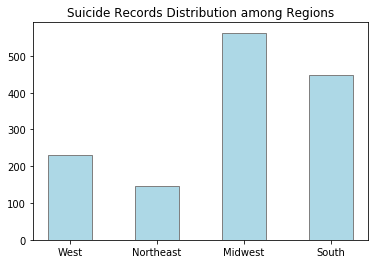

In [226]:
plt.bar(range(len(count_sui_region)), list(count_sui_region.values()), align='center', edgecolor="grey", width=0.5,
        color="lightblue")
plt.xticks(range(len(count_sui_region)), list(count_sui_region.keys()))
plt.title("Suicide Records Distribution among Regions")

The plot shows that Midwest has the most suicide records, followed by South. West and Northeast has the least. But this is based on the real numbers. The project goal is to find out the suicide rate. Thus the number of total ICU visits should be taken into account.

In [227]:
region_overal_list = list(region_overal_clean["region"].copy())

In [228]:
count_region_overal = counter(region_overal_list)

In [229]:
print(count_region_overal)

{'West': 46348, 'Northeast': 14429, 'Midwest': 65950, 'South': 60294}


Text(0.5,1,'Overall ICU Records Distribution among Regions')

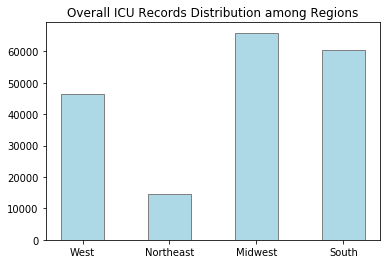

In [230]:
plt.bar(range(len(count_region_overal)), list(count_region_overal.values()), align='center', edgecolor="grey", width=0.5,
        color="lightblue")
plt.xticks(range(len(count_region_overal)), list(count_region_overal.keys()))
plt.title("Overall ICU Records Distribution among Regions")

 The plot shows the total number of ICU visit records in each region. 

Create a new table for the suicide region results and the overal region results.

In [231]:
region_sum = pd.DataFrame({'total of ICU records':pd.Series(count_region_overal),
                           'num of suicide records':pd.Series(count_sui_region)})

In [232]:
print(region_sum)

           num of suicide records  total of ICU records
Midwest                       563                 65950
Northeast                     145                 14429
South                         448                 60294
West                          231                 46348


In [233]:
region_sum["suicide_rate (%)"]=(region_sum["num of suicide records"]/region_sum["total of ICU records"]*100).round(4)

In [234]:
region_sum = region_sum.reset_index()

In [235]:
region_sum.rename(columns={"index":"region"}, inplace=True)

In [236]:
print(region_sum)

      region  num of suicide records  total of ICU records  suicide_rate (%)
0    Midwest                     563                 65950            0.8537
1  Northeast                     145                 14429            1.0049
2      South                     448                 60294            0.7430
3       West                     231                 46348            0.4984


Calculate the overal suicide rate in the US based on the eICU dataset. This includes rows with nan.

In [237]:
from __future__ import division
overal_sui_rate=round(len(sui_patient.index)/len(patient.index), 4)
overal_sui_rate

0.0073

The overal suicide rate in the US based on the eICU database is 0.0073, which is 0.73%.

[None, None, None, None]

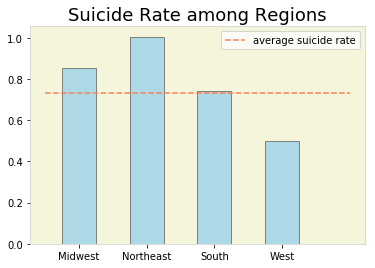

In [405]:
fig, ax =plt.subplots()
ax.bar(range(len(region_sum["suicide_rate (%)"])), region_sum["suicide_rate (%)"], align='center',color="lightblue", 
        edgecolor="grey",  width=0.5)
ax.plot([-0.5, len(region_sum["suicide_rate (%)"])], [overal_sui_rate*100, overal_sui_rate*100], "--", color="coral",
        label="average suicide rate")
ax.legend()
ax.set_facecolor ("beige")
ax.set_title("Suicide Rate among Regions", fontname='Comic Sans MS', fontsize=18, color="black")
plt.xticks(range(len(region_sum["region"])), list(region_sum["region"]), color ="black")
plt.setp(ax.spines.values(), color="lightgrey")

The results shows that the suicide rate in the Northeast is the highest with 1% suicide rate. The Midwest comes the second with 0.8% suicide rate. The South comes the third with 0.74%. The West has the lowest suicide rate.

Compared to the average suicide rate, besides the West, all the other three regions exceed the average line. The Northeast and the Midwest have much higher suicide rates than the average level, and the South has a similar suicide rate as the average level, while the West has much lower suicide rate than the average level.

### Updates
Create plots that show the suicide ICU records in each hospital which is labelled with a color to indicate its belonging region.

In [243]:
sui_hospital_list = list(sui_region_clean["hospitalid"].copy())
#print(sui_hospital_list)

In [285]:
count_sui_hospital = counter(sui_hospital_list)
#type(count_sui_hospital.keys())

In [337]:
region_by_hospital = sui_region_clean.loc[:, ["hospitalid", "region"]].drop_duplicates(
    subset=['hospitalid', 'region']).rename(columns = {'hospitalid':'Hospital_ID', "region":"Region"})
region_by_hospital.head()

,Hospital_ID,Region
0,56,Midwest
3,58,Midwest
14,60,Midwest
20,61,Midwest
21,63,Midwest


In [533]:
hospital_sum1 = pd.DataFrame({"Number_of_Suicide_Records": pd.Series(count_sui_hospital)}).reset_index().rename(columns = 
                                                                                                     {'index':'Hospital_ID'})

hospital_sum = pd.merge(hospital_sum1, region_by_hospital, how="left")
#hospital_sum

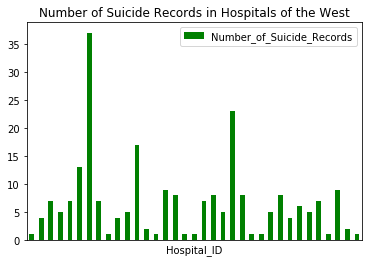

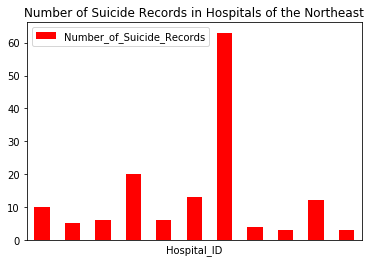

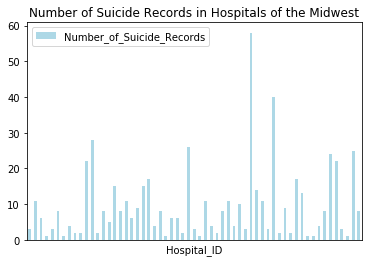

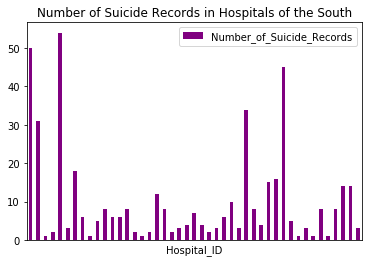

In [528]:
hospital_sum.loc[hospital_sum["Region"]=="West"].plot.bar(x="Hospital_ID", y="Number_of_Suicide_Records", color="green")
plt.xticks([])
plt.title("Number of Suicide Records in Hospitals of the West")
hospital_sum.loc[hospital_sum["Region"]=="Northeast"].plot.bar(x="Hospital_ID", y="Number_of_Suicide_Records", color="Red")
plt.xticks([])
plt.title("Number of Suicide Records in Hospitals of the Northeast")
hospital_sum.loc[hospital_sum["Region"]=="Midwest"].plot.bar(x="Hospital_ID", y="Number_of_Suicide_Records", 
                                                            color="lightblue")
plt.xticks([])
plt.title("Number of Suicide Records in Hospitals of the Midwest")
hospital_sum.loc[hospital_sum["Region"]=="South"].plot.bar(x="Hospital_ID", y="Number_of_Suicide_Records", color="purple")
plt.xticks([])
plt.title("Number of Suicide Records in Hospitals of the South")
plt.show()

The plots show that the number of suicide records in the hospitals varies. This applys to all regions.

The dataframe hospital_sum has hospital ID, the number of suicide records in that hospital and the belonging region of that hospital.

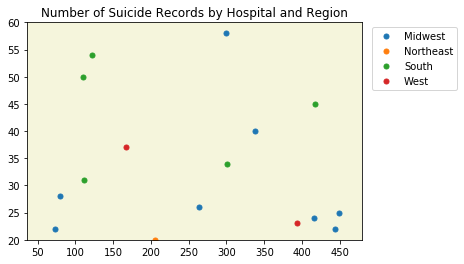

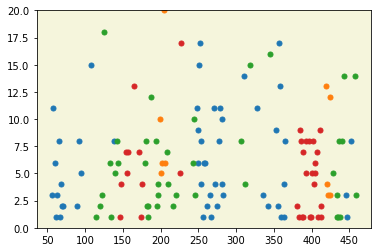

In [531]:
groups = hospital_sum.groupby("Region")
fig, ax1 = plt.subplots()
for name, group in groups:
    ax1.plot(group.Hospital_ID, group.Number_of_Suicide_Records, marker='o', linestyle='', ms=5, label=name)
ax1.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
ax1.set_title("Number of Suicide Records by Hospital and Region")
+36#x1.set_xlim([50, 490])
ax1.set_ylim([20, 60])
ax1.set_facecolor("beige")
#ax1.get_xaxis().set_visible(False)

fig, ax2 = plt.subplots()
for name, group in groups:
    ax2.plot(group.Hospital_ID, group.Number_of_Suicide_Records, marker='o', linestyle='', ms=5, label=name)
#ax2.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
#ax2.set_xlim([50, 490])
ax2.set_ylim([0, 20])
ax2.set_facecolor("beige")

plt.show()

Most hospitals have less than 10 suicide admission records. Some have more than 20 records.